
## Chapter 3 [Imaging](Ch3-Imaging.ipynb)


<hr style="height:1px;border-top:4px solid #FF8200" />

# Registration of Images in a Stack 


part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes







## First we import the usual libraries
Please visit the  section for [pyTEMlib](Ch1-Prerequesites.ipynb#TEM_Library) of the [Prerequesites](Ch1-Prerequesites.ipynb) section for information of necessary packages.

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook
%gui qt

# Import libraries from the book

import pyTEMlib
import pyTEMlib.file_tools  as ft     # File input/ output library
import pyTEMlib.image_tools as it

# import packages for pyUSID
import pyUSID as usid
import h5py

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyUSID version: ',usid.__version__)
print('pyTEM version: ',pyTEMlib.__version__)

__notebook__ = 'CH3-Image_Registration'
__notebook_version__ = '2019_04_20'


Populating the interactive namespace from numpy and matplotlib
windows
pyUSID version:  0.0.4
pyTEM version:  0.5.2019


## Load an image :

We load an image and we start our calculation log, which we set up as a python dictionary. <br>
Please note that the **open file dialog** might not apear in the foreground!

In [14]:
print(dict(current_channel).keys())
print(current_channel['title'][()])

dict_keys(['Position_Indices', 'Position_Values', 'Raw_Data', 'Spectroscopic_Indices', 'Spectroscopic_Values', 'data_type', 'detector_type', 'image_mode', 'image_stack', 'image_type', 'original_metadata', 'seconds_per_pixel', 'spatial_scale_x', 'spatial_scale_y', 'spatial_size_x', 'spatial_size_y', 'spatial_units', 'title'])
1-3D Stack


In [10]:
h5_file.close()

<IPython.core.display.Javascript object>


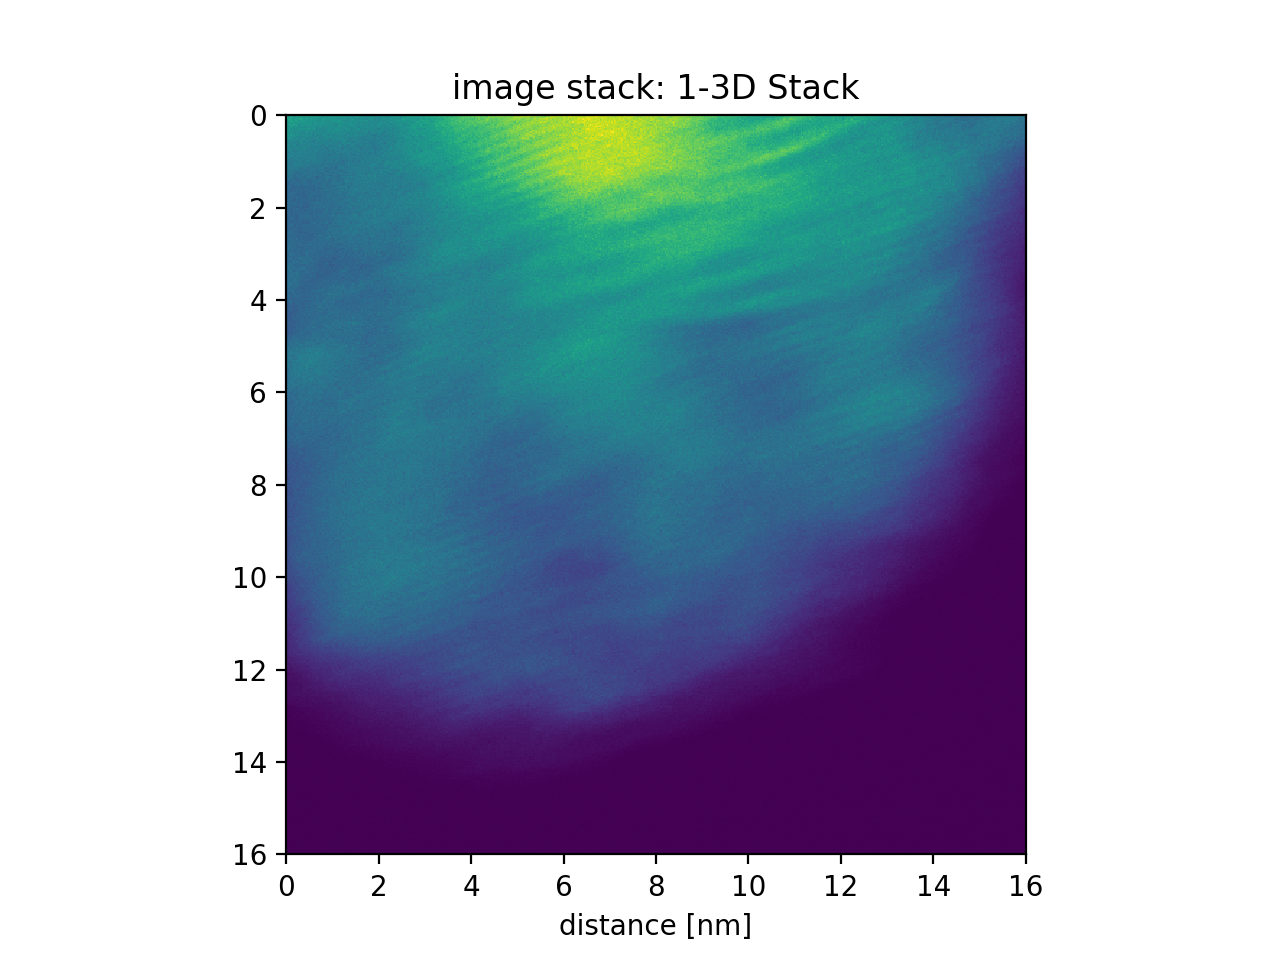

In [3]:
# Load file
h5_file.close()
h5_file = ft.h5open_file()#os.path.join(current_directory,filename))
current_channel = h5_file['Measurement_000/Channel_000']


ft.plt_pyUSID(current_channel)


out_tags = {}


## Input stack data
We put all the input data into a dictionary named tags

In [4]:
 ## spatial data
tags = {}
tags['sizeX'] = current_channel['spatial_size_x'][()]
tags['sizeY'] = current_channel['spatial_size_y'][()]
tags['scaleX'] = current_channel['spatial_scale_x'][()]
tags['scaleY'] = current_channel['spatial_scale_y'][()]
tags['extent'] = (0,tags['sizeX']*tags['scaleX'],tags['sizeY']*tags['scaleY'],0)
if 'image_stack' in current_channel:
    tags['image_stack'] = current_channel['image_stack'][()] 
        

# Registration

If this is an image stack we need to register and add the images. 

If this is not an image stack, we just take whatever image you opened.


Image stack
Stack contains  20  images, each with 512  pixels in the x-direction and  512  pixels in the y-direction
Image number 0  xshift =  -10.411  y-shift = 0.01
Image number 1  xshift =  -18.46  y-shift = 0.087
Image number 2  xshift =  -16.512  y-shift = 0.029
Image number 3  xshift =  -12.551  y-shift = 0.057
Image number 4  xshift =  -10.128  y-shift = 0.051
Image number 5  xshift =  -12.412  y-shift = 0.11
Image number 6  xshift =  -10.379  y-shift = 0.153
Image number 7  xshift =  -6.773  y-shift = 0.15
Image number 8  xshift =  -4.748  y-shift = 0.124
Image number 9  xshift =  -2.48  y-shift = 0.075
Image number 10  xshift =  -0.001  y-shift = -0.001
Image number 11  xshift =  2.641  y-shift = -0.091
Image number 12  xshift =  5.679  y-shift = -0.204
Image number 13  xshift =  8.124  y-shift = -0.178
Image number 14  xshift =  4.418  y-shift = -0.063
Image number 15  xshift =  7.797  y-shift = -0.076
Image number 16  xshift =  11.798  y-shift = -0.053
Image number 17  xshif

<IPython.core.display.Javascript object>


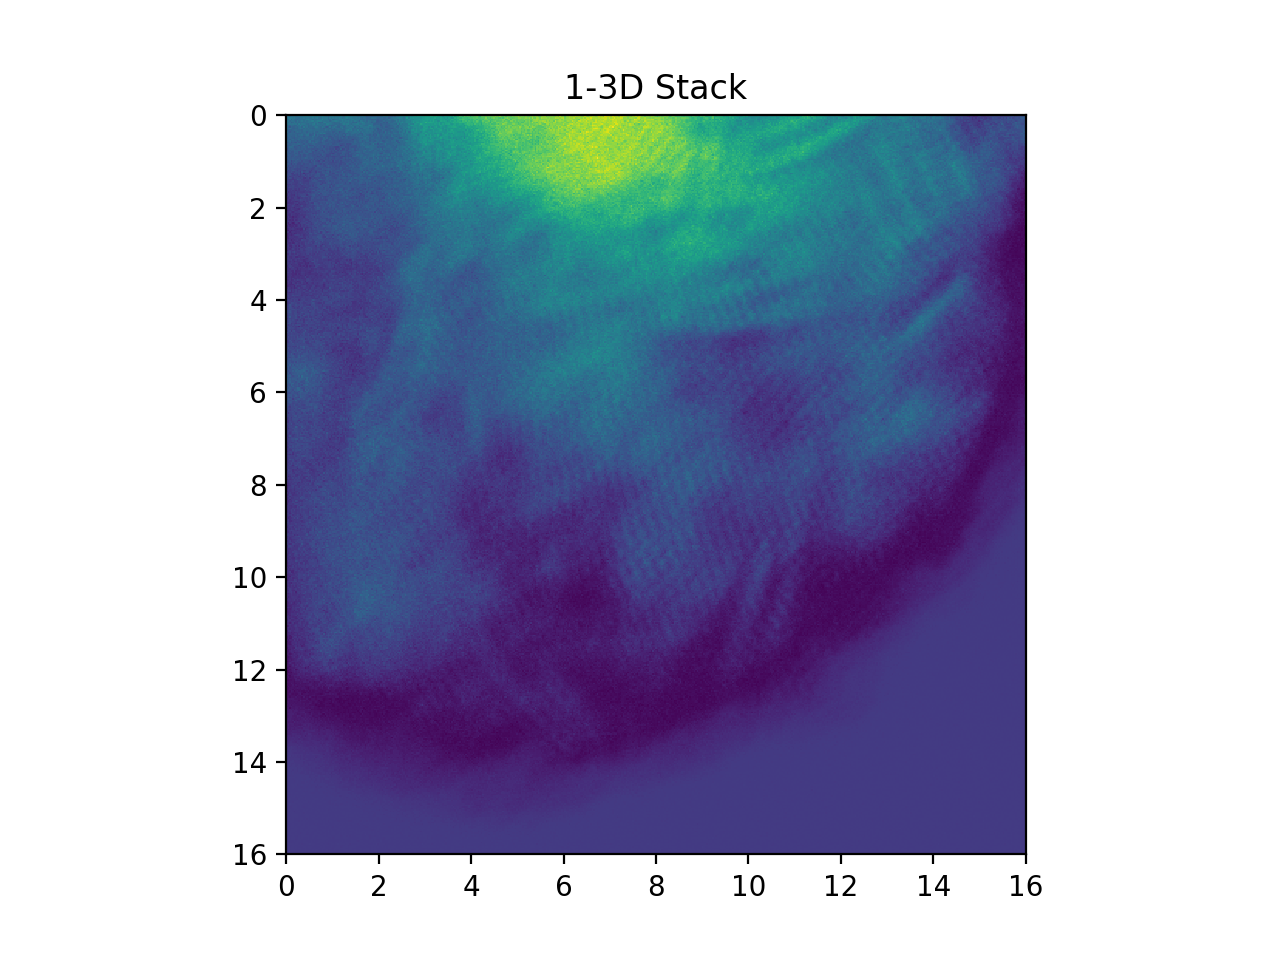

In [5]:
if 'image_stack' in tags:
    print('Image stack')
    data_cube = tags['image_stack']
    nopix = data_cube.shape[0]
    nopiy = data_cube.shape[1]
    nimages = data_cube.shape[2]

    print('Stack contains ',nimages,' images, each with',nopix,' pixels in the x-direction and ', nopiy,' pixels in the y-direction')

    stack = np.transpose(data_cube, axes=(1,0,2) )
    
    RigReg ,drift = it.dftRigReg(stack)
    image_boundaries = it.CropImage(drift[:], stack.shape, verbose = False)

    [xpmin,xpmax,ypmin,ypmax] = image_boundaries

    print()        
    print ('Cropped area ranges',xpmin,':',xpmax, ' in the x-direction')         
    print ('Cropped area ranges',ypmin,':',ypmax, ' in the y-direction')   
    ixrange = xpmax-xpmin + 1 
    iyrange = ypmax-ypmin + 1
    print('Which results in a cropped image',ixrange,' pixels in the x direction and',iyrange, 'pixel in the y-direction' )
    RigReg_crop = RigReg[ypmin:ypmax+1, xpmin:xpmax+1,:] # Note we only use the images with continuous drift

    RigReg_image = np.sum(RigReg_crop, axis=2)
    size = np.min(RigReg_image.shape)
    im = RigReg_image[0:size,0:size]
    
    out_tags['Rigid_registration_stack']=RigReg_crop
    out_tags['Rigid_registration_drift']=drift
    out_tags['data']=im
    
else:
    
    data = current_channel['Raw_Data'][()]
    im = np.reshape(data, [tags['sizeX'], tags['sizeY']])
    
plt.figure()
plt.title(current_channel['title'][()] )
plt.imshow(im,extent = tags['extent'], origin = 'upper');

## Log Rigid Registration

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Log_000
      -------
      ├ Rigid_registration_drift
      ├ Rigid_registration_stack
      ├ _rigid_registration
      ├ analysis
      ├ data
      ├ extent
      ├ notebook
      ├ notebook_version
      ├ spatial_origin_x
      ├ spatial_origin_y
      ├ spatial_scale_x
      ├ spatial_scale_y
      ├ spatial_size_x
      ├ spatial_size_y
      ├ spatial_units
      ├ time_stamp
      ├ title
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ data_type
    ├ detector_type
    ├ image_mode
    ├ image_stack
    ├ image_type
    ├ original_metadata
      -----------------
    ├ seconds_per_pixel
    ├ spatial_scale_x
    ├ spatial_scale_y
    ├ spatial_size_x
    ├ spatial_size_y
    ├ spatial_units
    ├ title


<IPython.core.display.Javascript object>


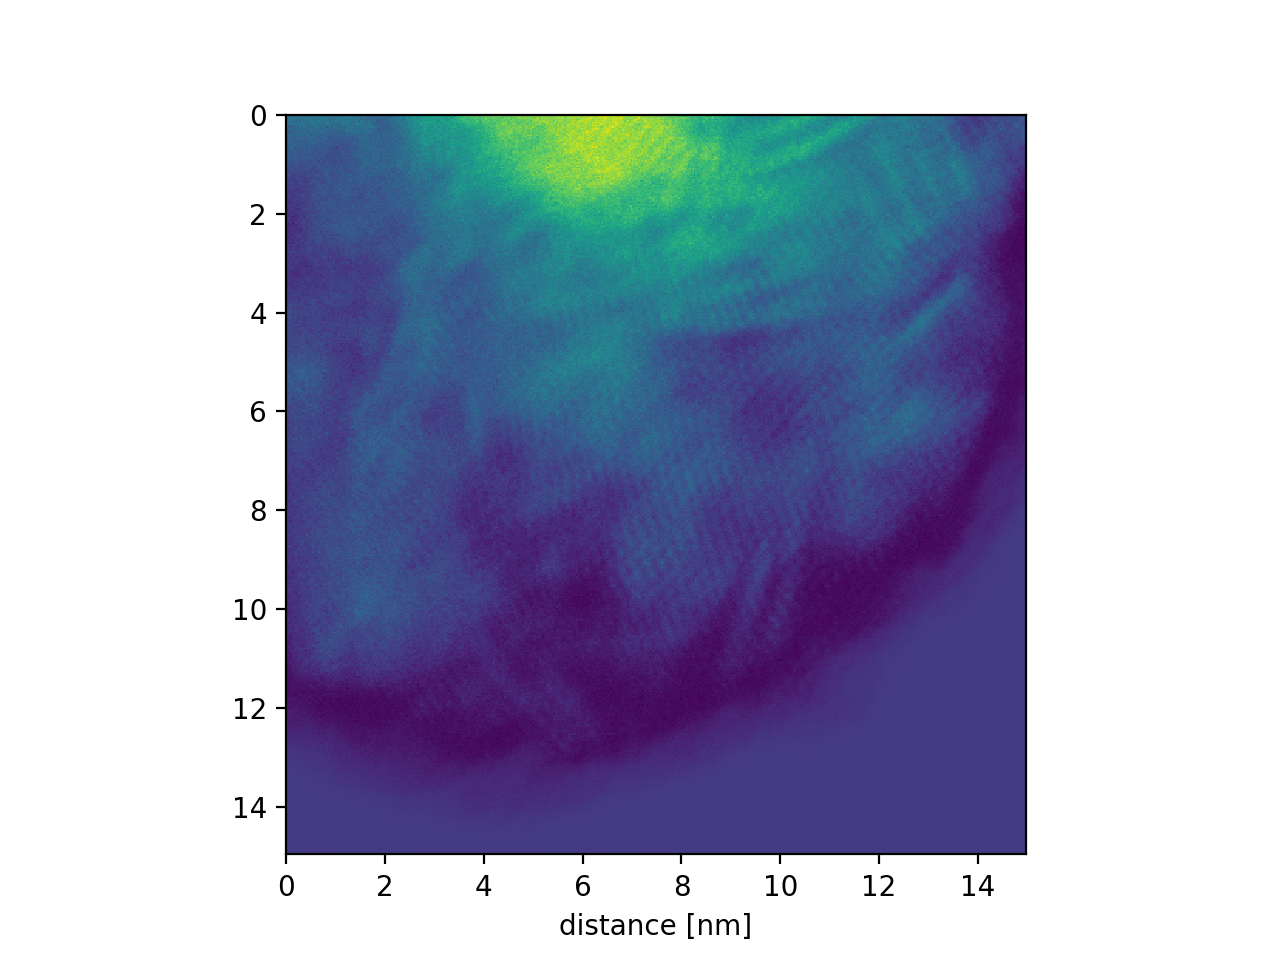

In [6]:

out_tags['analysis'] = 'Rigid Registration'
out_tags['notebook']= __notebook__ 
out_tags['notebook_version']= __notebook_version__

out_tags['data'] = im
out_tags['spatial_origin_x'] = 0.
out_tags['spatial_origin_y'] = 0.
out_tags['spatial_scale_x'] = current_channel['spatial_scale_x'][()]
out_tags['spatial_scale_y'] = current_channel['spatial_scale_y'][()]
out_tags['spatial_size_x'] = im.shape[0]
out_tags['spatial_size_y'] = im.shape[1]
out_tags['spatial_units'] = 'nm'


FOV_x = out_tags['spatial_size_x']* out_tags['spatial_scale_x']
FOV_y = out_tags['spatial_size_y']* out_tags['spatial_scale_y']
out_tags['extent'] = [0,FOV_x,FOV_y, 0]
name = 'rigid_registration'
log_group = ft.h5_add_Log(current_channel, name)
ft.h5_add_Data2Log(log_group,  out_tags)


usid.hdf_utils.print_tree(h5_file)


fig = plt.figure()
plt.imshow(out_tags['data'],origin='upper', extent = out_tags['extent'])
plt.xlabel('distance ['+ out_tags['spatial_units']+']');


## Non-Rigid Registration

Here we use the **Diffeomorphic Demon Non-Rigid Registration** as provided by the  

Please Cite: 
* [simpleITK](http://www.simpleitk.org/SimpleITK/project/parti.html)
    
    and
    
* [T. Vercauteren, X. Pennec, A. Perchant and N. Ayache *Diffeomorphic Demons Using ITK\'s Finite Difference Solver Hierarchy* The Insight Journal, 2007](http://hdl.handle.net/1926/510)

image  0
image  1
image  2
image  3
image  4
image  5
image  6
image  7
image  8
image  9
image  10
image  11
image  12
image  13
image  14
image  15
image  16
image  17
image  18
image  19
:-)
You have succesfully completed Diffeomorphic Demons Registration


<IPython.core.display.Javascript object>


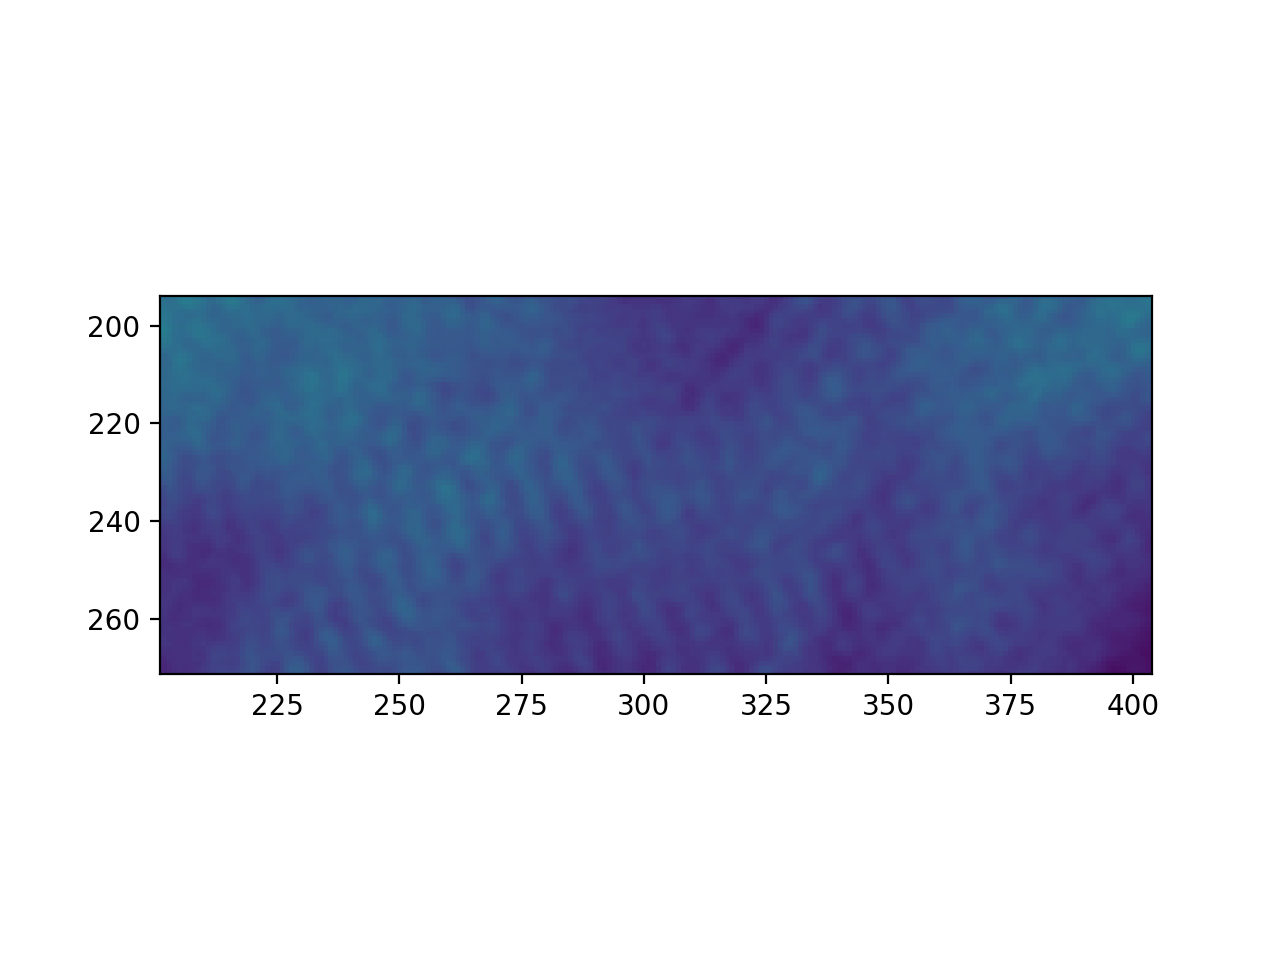

In [7]:

non_rigid_registered = it.DemonReg(RigReg_crop)

DemReg_image = np.sum(non_rigid_registered, axis=2)

plt.figure()
plt.imshow(DemReg_image);

## Log Non-Rigid Registration

Log_000 includes analysis: Rigid Registration
Log_001 includes analysis: Non-Rigid Registration


<IPython.core.display.Javascript object>


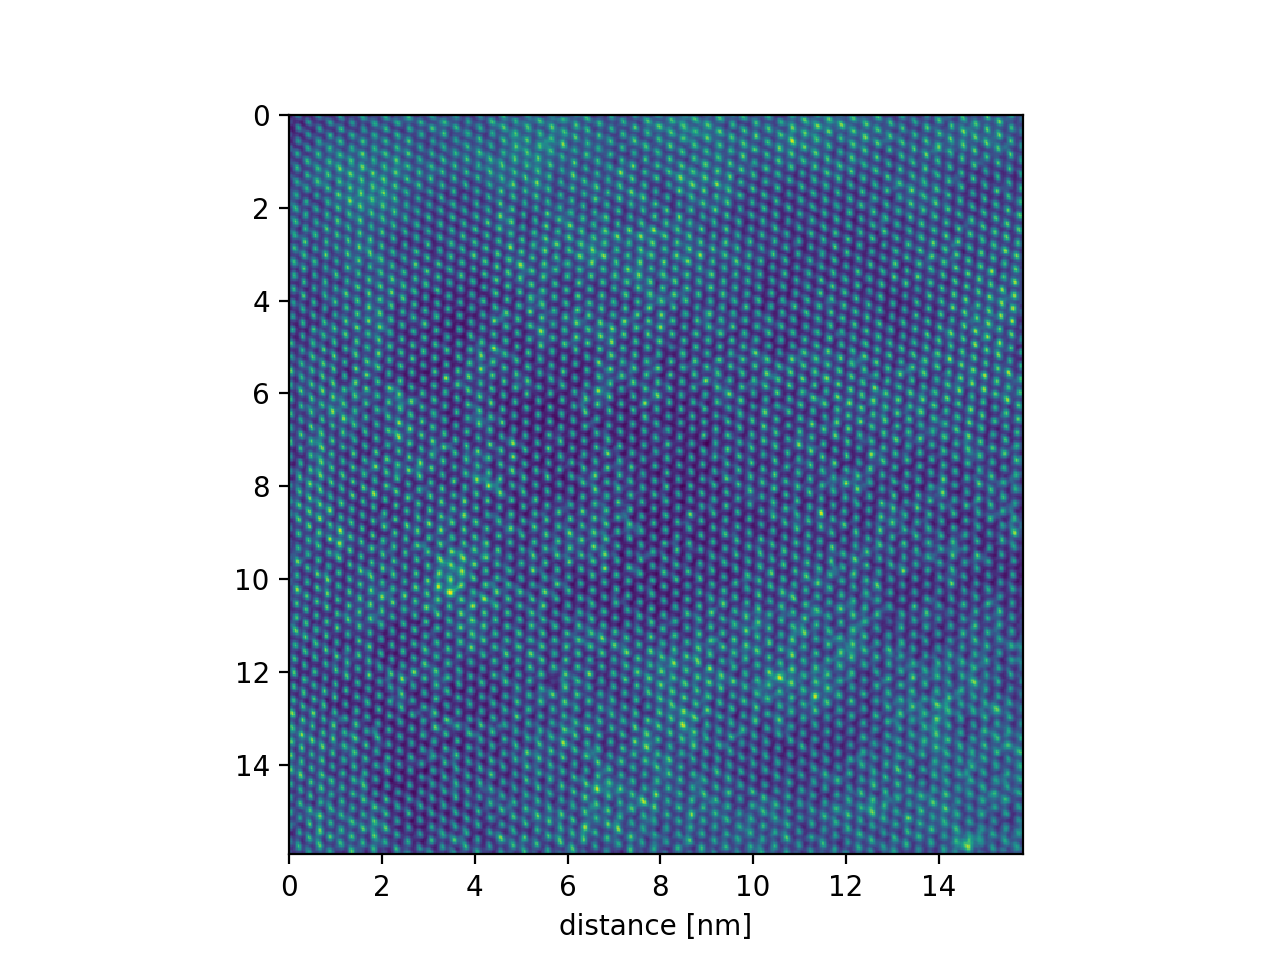

In [9]:
out_tags={}

out_tags['analysis']= 'Non-Rigid Registration'
out_tags['notebook']= __notebook__ 
out_tags['notebook_version']= __notebook_version__

out_tags['data'] = np.sum(non_rigid_registered, axis=2)
out_tags['Non_Rigid_registration_stack']=non_rigid_registered
    
out_tags['spatial_origin_x'] = 0.
out_tags['spatial_origin_y'] = 0.
out_tags['spatial_scale_x'] = current_channel['spatial_scale_x'][()]
out_tags['spatial_scale_y'] = current_channel['spatial_scale_y'][()]
out_tags['spatial_size_x'] = DemReg_image.shape[0]
out_tags['spatial_size_y'] = DemReg_image.shape[1]
out_tags['spatial_units'] = 'nm'

FOV_x = out_tags['spatial_size_x']* out_tags['spatial_scale_x']
FOV_y = out_tags['spatial_size_y']* out_tags['spatial_scale_y']
out_tags['extent'] = [0,FOV_x,FOV_y, 0]
name = 'non-rigid_registration'
log_group = ft.h5_add_Log(current_channel, name)
ft.h5_add_Data2Log(log_group, name, out_tags)

for key in current_channel:
    if 'Log' in key:
        print(f"{key} includes analysis: {current_channel[key]['analysis'][()]}")

fig = plt.figure()
plt.imshow(out_tags['data'],origin='upper', extent = out_tags['extent'])
plt.xlabel('distance ['+ out_tags['spatial_units']+']');


# Close File

You can open this file now in the [Find atom positions](CH3-Find_Atoms.ipynb) notebook.  

In [10]:
h5_file.close()

In [31]:

log_channel = current_channel['Log_001']
im = log_channel['data'][()]
#########
# INPUT #
#########
out_tags  =  {}
out_tags['image'] = im
out_tags['rel_blob_size'] = .2 # between 0 and 1 nromally around 0.5
out_tags['source_size'] = 0.08 #in nm gives the size of the atoms or resolution
out_tags['nearest_neighbours'] = 7 # up to this number nearest neighbours are evaluated (normally 7)
out_tags['threshold'] =  .04 # between 0.01 and 0.1 
out_tags['rim_size'] = 2# size of rim in multiples of source size
out_tags['spatial_scale_x'] = current_channel['spatial_scale_x'][()]
out_tags['spatial_scale_y'] = current_channel['spatial_scale_y'][()]
out_tags['pixel_size'] = current_channel['spatial_scale_x'][()]

print(f"The source size {out_tags['source_size']*1000:.1f} pm is used as measure of atom size which is a patch with diameter {out_tags['source_size']/ out_tags['pixel_size']:.0f} pixels  " )
atoms, mid_atoms, rim_atoms = it.find_atoms(im, out_tags)
print('atoms', len(atoms))
out_tags['mid_atoms'] = mid_atoms
out_tags['rim_atoms'] = rim_atoms
out_tags['atoms'] = atoms


out_tags['number_of_atoms'] = len(atoms)
out_tags['number_of_evaluated_atoms']=len(mid_atoms)

fig1, ax = plt.subplots(1, 1,figsize=(11,10))
ax.set_title("blobs")
plt.imshow(im, interpolation='nearest',cmap='gray')
plt.scatter(mid_atoms[:, 0], mid_atoms[:, 1], c='r', s=20, alpha = .5);

The source size 80.0 pm is used as measure of atom size which is a patch with diameter 5 pixels  
5


ValueError: cannot reshape array of size 251995 into shape (501,501)

In [145]:
def find_atoms(im, tags):
    from skimage.feature import  blob_log #blob_dog, blob_doh
    if 'rel_blob_size' not in tags:
        tags['rel_blob_size'] = .4 # between 0 and 1 nromally around 0.5
        tags['source_size'] = 0.06 #in nm gives the size of the atoms or resolution
        tags['nearest_neighbours'] = 7 # up to this number nearest neighbours are evaluated (normally 7)
        tags['threshold'] =  .15 # between 0.01 and 0.1 
        tags['rim_size'] = 2# size of rim in multiples of source size
        
    rel_blob_size = tags['rel_blob_size'] # between 0 and 1 nromally around 0.5
    source_size = tags['source_size']  #in nm gives the size of the atoms
    nearest_neighbours  = tags['nearest_neighbours'] # up to this number nearest neighbours are evaluated (normally 7)
    threshold = tags['threshold']  # between 0.01 and 0.1 
    rim_size = tags['rim_size'] # sizeof rim in multiples of resolution
    pixel_size = tags['pixel_size']
                      
    rim_width = rim_size*source_size/pixel_size
    
    ## Get a noise free image: reduced
    #pixel_size = FOV/im.shape[0]
    reduced_image = it.clean_svd(im,pixel_size=pixel_size,source_size=source_size)

    reduced_image = reduced_image-reduced_image.min()
    reduced_image = reduced_image/reduced_image.max()

    tags['reduced_image'] = reduced_image
    patch_size = im.shape[0]-reduced_image.shape[0]
    print(f' Use {patch_size} x {patch_size} pixels for image-patch of atoms')

    # Find atoms    
    thresh = reduced_image.std()*threshold
    blobs = blob_log(np.array(reduced_image), max_sigma=source_size/pixel_size, threshold=thresh)
    plot_image = im[int(patch_size/2):,int(patch_size/2):]

    atoms = []
    from skimage.feature import blob_log
    for blob in blobs:
        y, x, r = blob
        if r > patch_size*rel_blob_size:
            atoms.append([x+patch_size/2,y+patch_size/2,r])

    rim_atoms = []

    for i in range(len(atoms)):
        if (np.array(atoms[i][0:2])<rim_width).any() or (np.array(atoms[i]) > im.shape[0]-rim_width-5).any():
            rim_atoms.append(i)
    rim_atoms=np.unique(rim_atoms)
    mid_atoms_list = np.setdiff1d(np.arange(len(atoms)),rim_atoms)
    print(len(mid_atoms_list), len(rim_atoms), len(atoms))
    mid_atoms = np.array(atoms)[mid_atoms_list]
    print(f'Evaluated {len(mid_atoms)} atom positions')
    
    return atoms, mid_atoms, rim_atoms 

In [169]:
atoms, mid_atoms, rim_atoms = find_atoms(im, out_tags)
out_tags['mid_atoms'] = mid_atoms
out_tags['rim_atoms'] = rim_atoms
out_tags['atoms'] = atoms


out_tags['number_of_atoms'] = len(atoms)
out_tags['number_of_evaluated_atoms']=len(mid_atoms)


5


C:\Users\gdusc\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


 Use 4 x 4 pixels for image-patch of atoms
1148 170 1318
Evaluated 1148 atom positions


In [168]:
print(mid_atoms)

[[470.         487.           2.83111111]
 [381.         487.           3.28888889]
 [282.         486.           1.45777778]
 ...
 [292.          12.           2.83111111]
 [133.          12.           2.83111111]
 [221.          11.           3.28888889]]


## Log Atom Positions

In [144]:
print(rim_atoms.dtype)

int32


In [159]:
out_tags['analysis']= 'Atom Positions'
out_tags['data'] = 
out_tags['spatial_origin_x'] = 0.
out_tags['spatial_origin_y'] = 0.
out_tags['spatial_scale_x'] = current_channel['spatial_scale_x'][()]
out_tags['spatial_scale_y'] = current_channel['spatial_scale_y'][()]
out_tags['spatial_size_x'] = im.shape[0]
out_tags['spatial_size_y'] = im.shape[1]
out_tags['spatial_units'] = 'nm'


FOV_x = out_tags['spatial_size_x']* out_tags['spatial_scale_x']
FOV_y = out_tags['spatial_size_y']* out_tags['spatial_scale_y']
out_tags['extent'] = [0,FOV_x,FOV_y, 0]
name = 'Atom finding'
        
log_group = ft.h5_add_Log(current_channel, name)
ft. h5_add_Data2Log(log_group, name, out_tags)

usid.hdf_utils.print_tree(h5_file)


/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Log_000
      -------
      ├ Rigid_registration_drift
      ├ Rigid_registration_stack
      ├ Rigid_registration_sum
      ├ _rigid_registration
      ├ analysis
      ├ data
      ├ extent
      ├ spatial_origin_x
      ├ spatial_origin_y
      ├ spatial_scale_x
      ├ spatial_scale_y
      ├ spatial_size_x
      ├ spatial_size_y
      ├ spatial_units
      ├ time_stamp
      ├ title
    ├ Log_001
      -------
      ├ _atom finding
      ├ analysis
      ├ atoms
      ├ extent
      ├ image
      ├ mid_atoms
      ├ nearest_neighbours
      ├ number_of_atoms
      ├ number_of_evaluated_atoms
      ├ pixel_size
      ├ reduced_image
      ├ rel_blob_size
      ├ rim_atoms
      ├ rim_size
      ├ source_size
      ├ spatial_origin_x
      ├ spatial_origin_y
      ├ spatial_scale_x
      ├ spatial_scale_y
      ├ spatial_size_x
      ├ spatial_size_y
      ├ spatial_units
      ├ threshold
      ├ time_stamp

In [19]:
help(it.atomRefine)
out_tags['radius'] = int(5)# out_tags['atoms']['source_size']
out_tags['MaxInt'] = 0
out_tags['MinInt'] = 0
#print(out_tags['atoms']['mid_atoms'])
a = it.atomRefine(out_tags['reduced_image'], np.array(out_tags['mid_atoms'],dtype=int), out_tags)



Help on function atomRefine in module pyTEMlib.image_tools:

atomRefine(image, atoms, tags, maxDist=2)



C:\Users\gdusc\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:436: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5
201 114


<IPython.core.display.Javascript object>


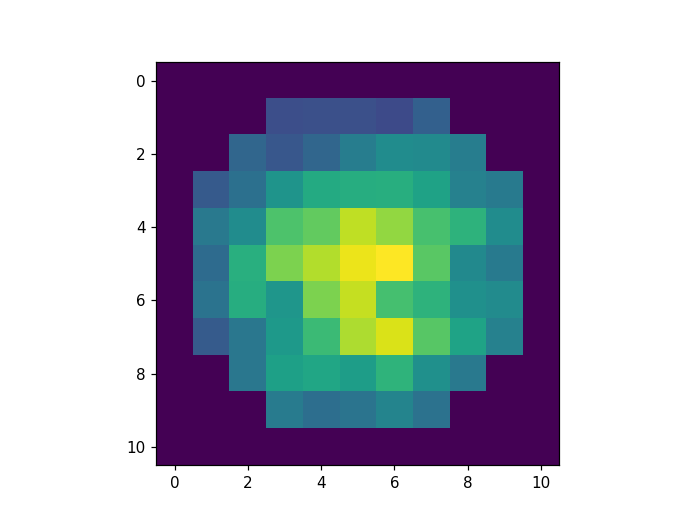

In [87]:

radius = int(out_tags['source_size'] / out_tags['spatial_scale_x']+0.5)
print(radius)
pixels = np.linspace(0,2*radius,2*radius+1)-radius
x,y = np.meshgrid(pixels,pixels);
mask = (x**2+y**2) < radius**2 #

atoms = out_tags['mid_atoms']
i = 708
y,x = atoms[i][0:2]
x = int(x)
y = int(y)
print(x,y)
area = im[x-radius:x+radius+1,y-radius:y+radius+1]*mask

plt.figure()
plt.imshow(area)

In [243]:
from scipy.optimize import leastsq
def atomRefine(image, atoms, tags, maxDist = 2):
    
    rr = int(tags['radius']+0.5) # atom radius
    print('using radius ',rr, 'pixels')
    
    pixels = np.linspace(0,2*rr,2*rr+1)-rr
    x,y = np.meshgrid(pixels,pixels);
    mask = (x**2+y**2) < rr**2 #
    
    def func(params,  xdata, ydata):
        width = ydata.shape[0]/2
        Gauss_width = params[0]
        x0 = params[1]
        y0 = params[2]
        inten = params[3]

        x, y = np.mgrid[-width:width, -width:width]

        gauss = np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / Gauss_width**2)*inten
        #self.img1b.setImage(gauss)
        return (ydata - gauss).flatten()


    ###
    # Determine sub pixel position and intensity  of all atoms within intensity range
    ###
    guess  = [rr, 0.0, 0.0 , 1]
    pout = [0.0, 0.0, 0.0 , 0.0]
    newatoms = []

    #tags['symmetry'] = {}
    sym = {}
    sym['number_of_atoms'] = len(atoms)
    

    for i in range(len( atoms)):
        
        y,x = atoms[i][0:2]
        x = int(x)
        y = int(y)
        append = False
        
        
        area = im[x-rr:x+rr+1,y-rr:y+rr+1]
                
        sym[str(i)] = {}
        sym[str(i)]['index']= i
        sym[str(i)]['x'] = x
        sym[str(i)]['y'] = y
        sym[str(i)]['Z'] = 0
        sym[str(i)]['Name'] = 'undefined'
        sym[str(i)]['Column'] = -1

        append = False
        
        if (x-rr) < 0 or y-rr <0 or x+rr+1 > image.shape[0] or y+rr+1 > image.shape[1]:
            sym[str(i)]['position'] = 'outside'
            sym[str(i)]['intensity area'] = 0 
            sym[str(i)]['maximum area'] = 0
        else:
            sym[str(i)]['position'] = 'inside'
            sym[str(i)]['intensity area'] = (area*mask).sum()
            sym[str(i)]['maximum area'] = (area*mask).max()
        
        if tags['MaxInt']>0:
            if area.sum()< tags['MaxInt']:                    
                if area.sum() > tags['MinInt']:
                    append = True
        elif area.sum()> tags['MinInt']:
            append = True
        
        if append:
            if (x-rr) < 0 or y-rr <0 or x+rr+1 > image.shape[0] or y+rr+1 > image.shape[1]:
                pout[0] = 0 # width
                pout[1] = 0 # dx
                pout[2] = 0 # dy
                pout[3] = 0 # amplitude
            else:
                pout, res =  leastsq(func, guess, args=(area, area))
            # shift cannot be larger than two pixels
            if (abs(pout[1])> maxDist) or (abs(pout[2])> maxDist):
                #print(i,x,y,pout[1],pout[2])
                pout[0] = 0 # width
                pout[1] = 0 # dx
                pout[2] = 0 # dy
                pout[3] = 0 # amplitude

            sym[str(i)]['x'] = x+pout[1]
            sym[str(i)]['y'] = y+pout[2]

            volume = 2* np.pi * pout[3] * pout[0]*pout[0]

            newatoms.append([y+pout[2]+1, x+pout[1]+1])# ,pout[0],  volume)) #,pout[3]))

            sym[str(i)]['Gauss width'] =  pout[0]
            sym[str(i)]['Gauss amplitude'] = pout[3]
            sym[str(i)]['Gauss volume'] = volume
            
    sym['atoms'] = newatoms
    return sym

In [244]:
out_tags['radius'] = out_tags['source_size'] / out_tags['spatial_scale_x']# out_tags['atoms']['source_size']
out_tags['MaxInt'] = 0
out_tags['MinInt'] = 0

sym = atomRefine(out_tags['reduced_image'], out_tags['mid_atoms'], out_tags)

print(sym.keys())
out_tags2 = {}
out_tags2['radius'] = out_tags['radius']
out_tags2['MaxInt'] = out_tags['MaxInt']
out_tags2['MinInt'] = out_tags['MinInt']


out_tags2['number_of_atoms']=sym['number_of_atoms']
out_tags2['atoms']=sym['atoms']
index = []
x = []
y = []
Z = []
Name = []
Column = []
position = []
intensity_area = []
maximum_area = []
Gauss_width = []
Gauss_amplitude = []
Gauss_volume = []
for i in range(sym['number_of_atoms']):
    x.append(sym[str(i)]['x'])
    y.append(sym[str(i)]['y'])
    Z.append(sym[str(i)]['Z'])
    Name.append(str(sym[str(i)]['Name']))
    Column.append(sym[str(i)]['Column'])
    if sym[str(i)]['position'] == 'inside':
        position.append(1)
    else:
        position.append(0)
            
    intensity_area.append(sym[str(i)]['intensity area'])
    maximum_area.append(sym[str(i)]['maximum area'])
    Gauss_width.append(sym[str(i)]['Gauss width'])
    Gauss_amplitude.append(sym[str(i)]['Gauss amplitude'])
    Gauss_volume.append(sym[str(i)]['Gauss volume'])

out_tags2['x'] = np.array(x)
out_tags2['y'] = np.array(y)
out_tags2['Z'] = np.array(Z)
#out_tags2['Name'] = np.array(Name)
out_tags2['Column'] = np.array(Column)
out_tags2['position'] = np.array(position)
out_tags2['intensity_area'] = np.array(intensity_area)
out_tags2['maximum_area'] = np.array(maximum_area)

out_tags2['Gauss_width'] = np.array(Gauss_width)
out_tags2['Gauss_amplitude'] = np.array(Gauss_amplitude)
out_tags2['Gauss_volume'] = np.array(Gauss_volume)


using radius  5 pixels


C:\Users\gdusc\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:436: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


dict_keys(['number_of_atoms', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '1

In [207]:
print(out_tags2['position'])

['inside' 'inside' 'inside' ... 'inside' 'inside' 'inside']


<IPython.core.display.Javascript object>


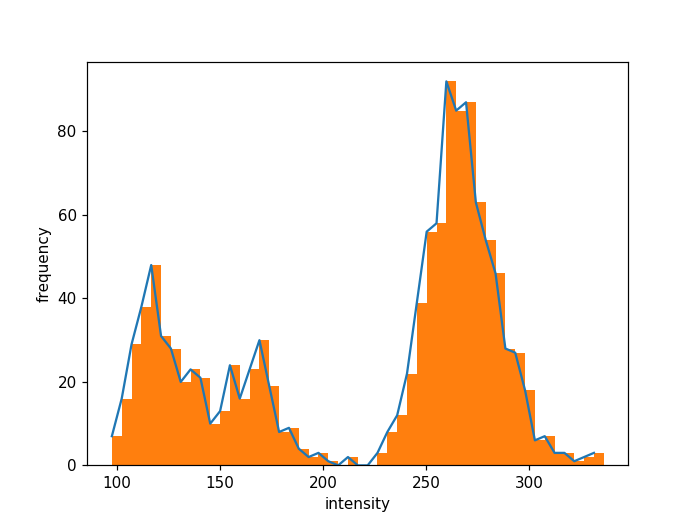

In [189]:


    
histo_intensities, multiplicity = np.histogram(out_tags2['intensity_area'], bins=nbins)


out_tags['intensities'] = intensities
out_tags['histogram_distances'] = histo_intensities
out_tags['histogram_multiplicity'] = multiplicity[:-1]
plt.figure()
plt.plot(multiplicity[:-1],histo_intensities)

plt.hist(out_tags2['intensity_area'], bins=nbins);
plt.xlabel('intensity')
plt.ylabel('frequency');

# Log Atom Refinement

In [220]:

out_tags2['analysis']= 'atom position refinement'

name = 'Atom refinement'

log_group = ft.h5_add_Log(current_channel, name)

ft.h5_add_Data2Log(log_group, name, out_tags2)

usid.hdf_utils.print_tree(h5_file)




/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Log_000
      -------
      ├ Rigid_registration_drift
      ├ Rigid_registration_stack
      ├ Rigid_registration_sum
      ├ _rigid_registration
      ├ analysis
      ├ data
      ├ extent
      ├ spatial_origin_x
      ├ spatial_origin_y
      ├ spatial_scale_x
      ├ spatial_scale_y
      ├ spatial_size_x
      ├ spatial_size_y
      ├ spatial_units
      ├ time_stamp
      ├ title
    ├ Log_001
      -------
      ├ _atom finding
      ├ analysis
      ├ atoms
      ├ extent
      ├ image
      ├ mid_atoms
      ├ nearest_neighbours
      ├ number_of_atoms
      ├ number_of_evaluated_atoms
      ├ pixel_size
      ├ reduced_image
      ├ rel_blob_size
      ├ rim_atoms
      ├ rim_size
      ├ source_size
      ├ spatial_origin_x
      ├ spatial_origin_y
      ├ spatial_scale_x
      ├ spatial_scale_y
      ├ spatial_size_x
      ├ spatial_size_y
      ├ spatial_units
      ├ threshold
      ├ time_stamp

## Log Ring Graph

In [320]:
out_tags2['analysis']= 'Ring Graph'

name = 'Ring Graph'

log_group = ft.h5_add_Log(current_channel, name)

ft.h5_add_Data2Log(log_group, name, out_tags2)

usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Log_000
      -------
      ├ Rigid_registration_drift
      ├ Rigid_registration_stack
      ├ Rigid_registration_sum
      ├ _rigid_registration
      ├ analysis
      ├ data
      ├ extent
      ├ spatial_origin_x
      ├ spatial_origin_y
      ├ spatial_scale_x
      ├ spatial_scale_y
      ├ spatial_size_x
      ├ spatial_size_y
      ├ spatial_units
      ├ time_stamp
      ├ title
    ├ Log_001
      -------
      ├ _atom finding
      ├ analysis
      ├ atoms
      ├ extent
      ├ image
      ├ mid_atoms
      ├ nearest_neighbours
      ├ number_of_atoms
      ├ number_of_evaluated_atoms
      ├ pixel_size
      ├ reduced_image
      ├ rel_blob_size
      ├ rim_atoms
      ├ rim_size
      ├ source_size
      ├ spatial_origin_x
      ├ spatial_origin_y
      ├ spatial_scale_x
      ├ spatial_scale_y
      ├ spatial_size_x
      ├ spatial_size_y
      ├ spatial_units
      ├ threshold
      ├ time_stamp

## Voronoi Analysis

In [222]:
def voronoi(atoms,im):
    tags = {}
    vor = Voronoi(np.array(atoms)[:,0:2])# Plot it:
    rim_vertices = []
    for i in range(len(vor.vertices)):

        if (vor.vertices[i,0:2]<0).any() or (vor.vertices[i,0:2] > im.shape[0]-5).any():
            rim_vertices.append(i)
    rim_vertices=set(rim_vertices)
    mid_vertices = list(set(np.arange(len(vor.vertices))).difference(rim_vertices))

    mid_regions = []
    for region in vor.regions: #Check all Voronoi polygons
        if all(x in mid_vertices for x in region) and len(region)>1: # we get a lot of rim (-1) and empty and  regions
            mid_regions.append(region)
    tags['voronoi']=vor
    tags['voronoi_vertices']=vor.vertices
    tags['voronoi_regions'] = vor.regions
    tags['voronoi_midVerticesIndices']=mid_vertices
    tags['voronoi_midVertices']=vor.vertices[mid_vertices]
    tags['voronoi_midRegions'] = mid_regions
    return tags


In [237]:
print(out_tags2['atoms'][0])

[ 487.43481496  470.56204122   10.49865966 3682.23436714]


<IPython.core.display.Javascript object>


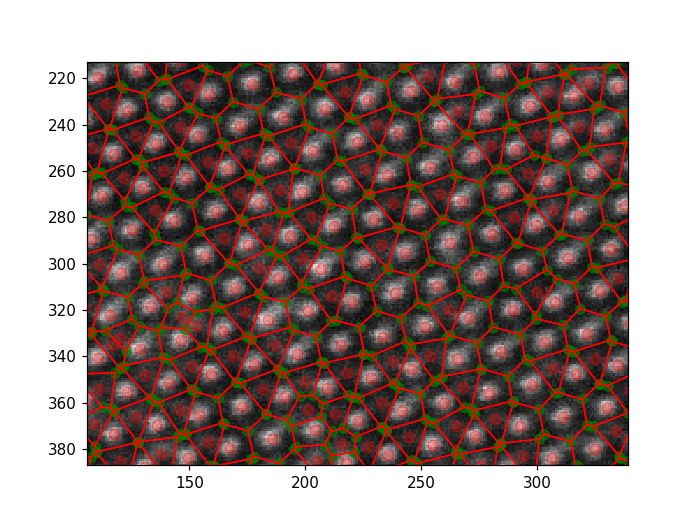

In [248]:
from matplotlib.patches import Polygon
from scipy.spatial import Voronoi, KDTree, cKDTree
out_tags2['atoms'] = np.array(out_tags2['atoms'])

out_tags3 = {}
out_tags3 = voronoi(out_tags2['atoms'], im)


out_tags3['analysis']=f'voronoi'

out_tags3['number_of_voronoi_vertices'] = len(out_tags3['voronoi_midVertices'])

#plotting
fig, ax = plt.subplots()
# plot input points blue
plt.imshow(im, cmap='gray')
#ax.scatter(vor.points[:,0],vor.points[:,1], color = 'b', alpha=0.6, s=40)
plt.scatter(out_tags2['atoms'][:, 0], out_tags2['atoms'][:, 1], color = 'red', s=50, alpha = .3, cmap='jet');

# plot vertices of voronoi tiles in green
ax.scatter(out_tags3['voronoi_midVertices'][:,0], out_tags3['voronoi_midVertices'][:,1], color = 'g', alpha=0.6, s=40)
#plot polygon from vertices


for region in out_tags3['voronoi_midRegions']: #Check all Voronoi polygons
    poly = Polygon( out_tags3['voronoi_vertices'][region,0:2], facecolor='none', edgecolor='r', linewidth = 1)
    ax.add_patch(poly)
               
# ensure pixels are square
ax.set_aspect('equal', 'datalim');

# Graphing

In [317]:
import scipy.spatial as sp
def get_new_vertices(vertices, pointTree):
    """
    Determines the rings in the plot according to planar graph theory
    """
    min_voronoi_distance = 0.95 
    # Define search tree for points and verties
    #pointTree = cKDTree(vor.points)
    vorTree   = cKDTree(vertices)

    nearVerticesIndex = []

    for i , vori in enumerate(vertices):
        pv = pointTree.query(vertices[i],10)
        vv = vorTree.query(vertices[i],10)
        
        pvmin = pv[0][:].min() *min_voronoi_distance # smallest distance of this vertice to any atom
        # Find all vertices that are closer than this nearest atom.
        nn = vorTree.query_ball_point(vori, pvmin)
        
        # Put these vertices in the list
        if len (nearVerticesIndex) == 0:
            nearVerticesIndex.append(nn)
            #print('ring around vertices: ', nn)
        exist = 0
        for j in range(len(nearVerticesIndex)):
            if i in nearVerticesIndex[j]:
                exist = 1
                if len(nn) > len(nearVerticesIndex[j]):
                    nearVerticesIndex[j] = nn
                    
        if exist == 0:
            nearVerticesIndex.append(nn)

    new_voronoi = []       
    # get new vertices by calculating the center of the too close vertices and just keep the single ones
    for ver_ind in  nearVerticesIndex:
        new_ver_point = np.median(vertices[ver_ind], axis=0) # center of all vertices
        new_voronoi.append(new_ver_point.flatten())
    
    return np.array(new_voronoi)
    
def ring_graph(atoms):
    """
    Determines the rings in the plot according to planar graph theory
    """
    
    vor = Voronoi(atoms)
    pointTree = cKDTree(vor.points)
    
    new_voronoi = get_new_vertices(vor.vertices, pointTree)
    #new_voronoi = get_new_vertices(new_voronoi2, pointTree)
    
    vor2 = Voronoi(new_voronoi)
    vor2Tree   = cKDTree(new_voronoi)
    
    # Find rings by doing a vornoi analsis of the new Voronoi vertices
    
    rings = {}
    
    rings['atoms'] = vor.points
    rings['centers'] = new_voronoi
    ring_center = []
    angles_list = []
    positions = []
    atom_indices = []
    cyclicity = []
    ##############################################
    ### Now we find which rings are associated with how many Voronoi vertices
    ##############################################
    print(vor2.points.shape,new_voronoi.shape)
    for i, point in enumerate(vor2.points):
        region_index = vor2.point_region[i] 
        region = vor2.regions[region_index]
        #print(vor2.points[i], vor2.vertices[region])

        #the vertice of the voronoi of a voronoi is the original lattice 
        rings[str(i)] = {}
        rings[str(i)]['center'] = point
        
        vv = vor2Tree.query(new_voronoi[i],10)
        # smallest distance to vertice 
        vertice_min_dist = (vv[0][:])[np.where(vv[0][:]>0)].min() /4 #0 is vertice itself
        
        
        nearest_neighbour_indices = []
        
        if len(region)>1 and (np.array(region)>-1).all():
            for vertice in region:
                dist, nn = pointTree.query(vor2.vertices[vertice], 2)
                if dist[1]-dist[0] < vertice_min_dist/5: #pathological case ()
                    ddd= sp.distance.cdist(vor.points[nn], point[np.newaxis,:])
                    if abs(ddd[1]-ddd[0]) <  vertice_min_dist/20:
                        #add both
                        nearest_neighbour_indices.extend([nn[0]])
                        nearest_neighbour_indices.extend([nn[1]])
                    else:
                        #add closest point
                        if ddd[1] <ddd[0]:
                            nearest_neighbour_indices.extend([nn[1]])
                        else:
                            nearest_neighbour_indices.extend([nn[0]])
                    
                else:
                    nearest_neighbour_indices.extend([nn[0]])
        
            
            
        nn = np.array(np.unique(nearest_neighbour_indices), dtype=int)
        center = np.median(vor.points[nn],axis=0)
        rel_positions =  vor.points[nn]-center
        
        angles = np.arctan2(rel_positions[:,0],rel_positions[:,1])
        ring_order = np.argsort(angles)
        sorted_ring = nn[ring_order]
        
        rings[str(i)]['angles'] = angles[ring_order]
        rings[str(i)]['positions'] = np.array(vor.points[sorted_ring])
        rings[str(i)]['atom_indices'] = sorted_ring
        rings[str(i)]['cyclicity'] = len(angles)
        ring_center.append(np.average(vor.points[sorted_ring], axis=0))
        angles_list.append(angles[ring_order])
        positions.append(vor.points[sorted_ring])
        atom_indices.append(sorted_ring)
        cyclicity.append(len(angles))
    
    rings['ring_centers'] = ring_center
    rings['angles'] = angles_list
    rings['positions'] = positions
    rings['atom_indices'] = atom_indices
    rings['cyclicities'] = cyclicity
    return rings

def plot_voronoi(ax, rings):
    """
    Plots the voronoi vertices and rings of the graph
    """
    
    for i in range(len(rings['centers'])):
        pos = rings['positions'][i]
        if len(pos)>1:

            for i in range(-1,len(pos)-1):
                ax.plot((pos[i][0],pos[i+1][0]),(pos[i][1],pos[i+1][1]),color='blue')

            col = 'gray'
            cyclicity = rings['cyclicities'][i]
            if cyclicity == 4:
                col = 'black'
            elif cyclicity == 5:
                col = 'g'
            elif cyclicity == 6:
                col = 'r'   
            elif cyclicity > 6:
                col = 'blue'    

            ax.add_patch(Polygon(pos, closed=True,fill=True,alpha = 0.2,edgecolor = 'black',facecolor = col,linewidth = .2))
            
    # plot input points blue
    ax.scatter(rings['atoms'][:,0],rings['atoms'][:,1], color = 'b', alpha=0.6, s=40)
    ax.scatter(rings['centers'][:,0],rings['centers'][:,1], color = 'orange', alpha=0.6, s=20)
    #ax.scatter(rings['vertices2'][:,0],rings['vertices2'][:,1], color = 'red', alpha=0.6, s=20)
    
    # ensure pixels are square
    ax.set_aspect('equal', 'datalim');
    
    




(827, 2) (827, 2)


C:\Users\gdusc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\gdusc\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\gdusc\Anaconda3\lib\site-packages\numpy\lib\function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


<IPython.core.display.Javascript object>


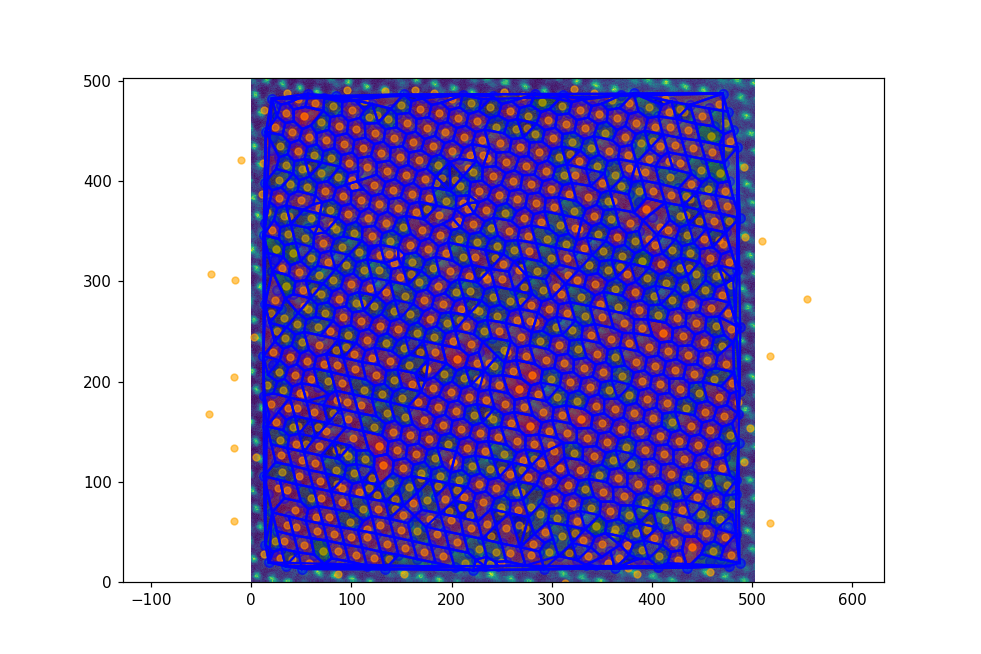

In [326]:

rings = ring_graph(out_tags2['atoms'])

out_tags4 = {}
out_tags4['analysis'] = 'graph'
out_tags4['atoms'] = rings['atoms'] 
out_tags4['centers'] = rings['centers'] 
out_tags4['ring_centers'] = np.array(rings['ring_centers']) 
out_tags4['angles'] = rings['angles']
out_tags4['positions'] = rings['positions']
out_tags4['atom_indices'] = rings['atom_indices']
out_tags4['cyclicities'] = rings['cyclicities']

fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.imshow(im)
ax.set_xlim(0,im.shape[0])

ax.set_ylim(0,im.shape[1])
plot_voronoi(ax, out_tags4)   

#ax.scatter(rings['ring_centers'][:,0],rings['ring_centers'][:,1], color = 'orange', alpha=0.6, s=20)

In [319]:
#del current_channel['Log_002']
usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Log_000
      -------
      ├ Rigid_registration_drift
      ├ Rigid_registration_stack
      ├ Rigid_registration_sum
      ├ _rigid_registration
      ├ analysis
      ├ data
      ├ extent
      ├ spatial_origin_x
      ├ spatial_origin_y
      ├ spatial_scale_x
      ├ spatial_scale_y
      ├ spatial_size_x
      ├ spatial_size_y
      ├ spatial_units
      ├ time_stamp
      ├ title
    ├ Log_001
      -------
      ├ _atom finding
      ├ analysis
      ├ atoms
      ├ extent
      ├ image
      ├ mid_atoms
      ├ nearest_neighbours
      ├ number_of_atoms
      ├ number_of_evaluated_atoms
      ├ pixel_size
      ├ reduced_image
      ├ rel_blob_size
      ├ rim_atoms
      ├ rim_size
      ├ source_size
      ├ spatial_origin_x
      ├ spatial_origin_y
      ├ spatial_scale_x
      ├ spatial_scale_y
      ├ spatial_size_x
      ├ spatial_size_y
      ├ spatial_units
      ├ threshold
      ├ time_stamp

dict_keys(['analysis', 'atoms', 'centers', 'ring_centers', 'angles', 'positions', 'atom_indices', 'cyclicities'])
dict_keys(['radius', 'MaxInt', 'MinInt', 'number_of_atoms', 'atoms', 'x', 'y', 'Z', 'Column', 'position', 'intensity_area', 'maximum_area', 'Gauss_width', 'Gauss_amplitude', 'Gauss_volume', 'analysis'])
269.9287 15.414983
a0 -1.8617022305056081 -109.59300689766026 0.4143883258589862
a1 0.10450944016516617 12.413217400320802 0.45973474225554983
a2 2.166846996897949 134.64078808723275 0.5654435970429511
152.79602 42.319145


<IPython.core.display.Javascript object>


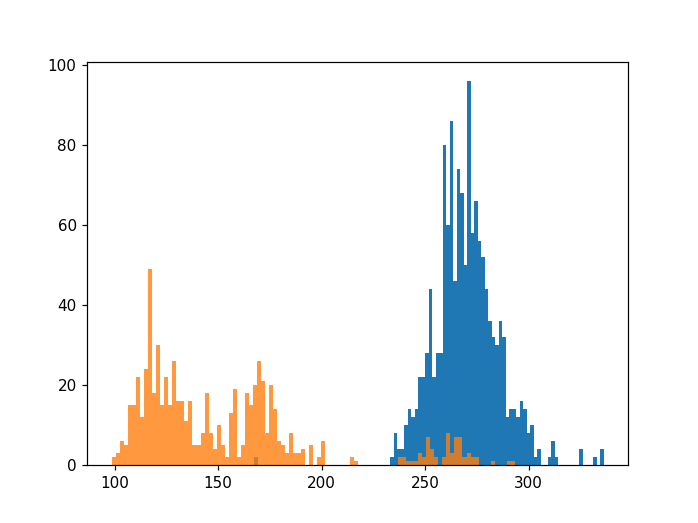

(array([ 2.,  3.,  6.,  5., 15., 15., 22., 12., 24., 49., 18., 30., 15.,
        22., 15., 26., 16., 16., 11., 16.,  5.,  5.,  8., 18.,  8.,  4.,
        10.,  5.,  2., 13., 19.,  2.,  5., 18., 15., 20., 26., 21.,  8.,
        20., 14.,  6.,  5.,  3.,  8.,  3.,  3.,  4.,  0.,  5.,  0.,  2.,
         6.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  1.,  1.,  1.,  3.,  2.,
         7.,  4.,  2.,  0.,  2.,  8.,  3.,  7.,  7.,  2.,  3.,  2.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([ 98.682724, 100.62942 , 102.57611 , 104.52281 , 106.469505,
        108.4162  , 110.36289 , 112.30959 , 114.25629 , 116.20298 ,
        118.14967 , 120.09637 , 122.04307 , 123.98976 , 125.936455,
        127.88315 , 129.82985 , 131.77654 , 133.72324 , 135.66994 ,
        137.61662 , 139.56332 , 141.51001 , 143.45671 , 145.40341 ,
        147.3501  , 149.2968  , 151.24348 , 153.19019 , 155.13689 ,
        157.08357 , 159.03

In [363]:
print(out_tags4.keys())
print(out_tags2.keys())
#print(ring['102'])
#print(out_tags['atoms']['voronoi'].points[666])
#print(sym[str(666)])
bright = []
angle = []
angle2 = []
angle3 = []
dimm=[]
ring_intensities = []
for rindex in range(len(rings['centers'])):
    intensity = []
    for ind in rings['atom_indices'][rindex]:
        index = int(ind)
        if str(index) in sym:
            intensity.append(sym[str(index)]['intensity area'])
    rings[str(rindex)]['intensity']=intensity
    ring_intensities.append(intensity)
    if rings[str(rindex)]['cyclicity'] == 6:
        intensity = np.array(intensity)
        index_by_intensity = np.array(np.argsort(intensity),dtype=int)
        bright.extend(intensity[index_by_intensity[3:6]])
        a = np.array(rings['angles'][rindex])
        aa = np.sort(a[index_by_intensity[3:6]] )
        
        angle.append(aa[0])
        angle2.append(aa[1])
        angle3.append(aa[2])
        bright.extend(np.sort(intensity)[3:6])
        dimm.extend(np.sort(intensity)[0:3])
        
print(np.mean(bright), np.std(bright))
print('a0', np.mean(angle), np.degrees(np.median(angle)), np.std(angle))
print('a1', np.mean(angle2), np.degrees(np.median(angle2)), np.std(angle2))
print('a2', np.mean(angle3), np.degrees(np.median(angle3)), np.std(angle3))
print(np.mean(dimm),np.std(dimm))

plt.figure()
plt.hist(bright, 100, alpha = 1)
plt.hist(dimm, 100, alpha = 0.8)

<IPython.core.display.Javascript object>


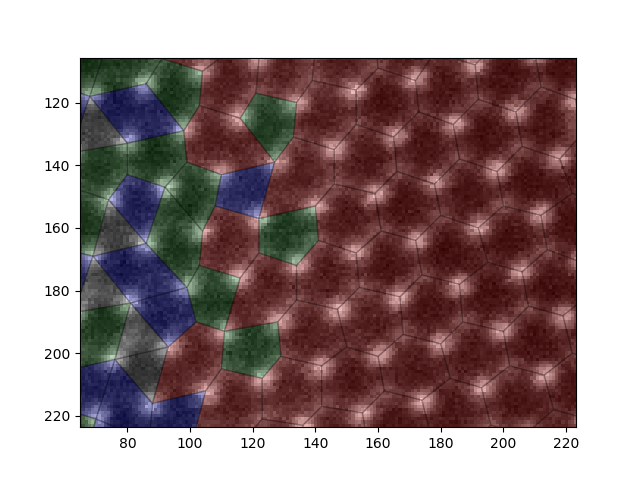

In [14]:
ring = out_tags['atoms']['ring']
fig = plt.figure()
plt.imshow(out_tags['image'] ,cmap='gray')

for i in range(len(ring)):
    col = 'gray'
    if ring[str(i)]['cyclicity'] == 4:
        col = 'blue'
    elif ring[str(i)]['cyclicity'] == 5:
        col = 'g'
    elif ring[str(i)]['cyclicity'] == 6:
        col = 'r'   
       
    elif ring[str(i)]['cyclicity'] > 6:
        col = 'black'    
        
    plt.gca().add_patch(Polygon(ring[str(i)]['points'], closed=True,fill=True,alpha = 0.2,edgecolor = 'black',facecolor = col,linewidth = 1))


#plt.scatter(out_tags['atoms']['mid_atoms'][:, 0], out_tags['atoms']['mid_atoms'][:, 1], c=out_tags['atoms']['clusters'], s=20, alpha = .5, cmap='jet');


plt.gca().set_aspect('equal', 'datalim');


In [321]:
from scipy.spatial import Voronoi, KDTree, cKDTree
print(ring['102']['point_indices'])
#ring = Graph(out_tags['atoms']['voronoi'],out_tags, 0.9)
print(ring['102'])

print(sym[str(661)])
print(out_tags['atoms']['voronoi'].points[678])

print(np.cos(np.radians(ring['102']['angles'])))
print(np.sin(np.radians(ring['102']['angles'])))

NameError: name 'ring' is not defined

In [118]:
vor = Voronoi(np.array(atoms)[:,0:2])# Plot it:
sizeX = 512
rim_vertices = []
for i in range(len(vor.vertices)):

    if (vor.vertices[i,0:2]<0).any() or (vor.vertices[i,0:2] > sizeX-5).any():
        rim_vertices.append(i)
rim_vertices = np.unique(rim_vertices)
mid_vertices = np.arange(len(vor.vertices))
print(rim_vertices)
mid_vertices = np.setdiff1d(np.arange(len(vor.vertices)),rim_vertices)#mid_vertices[! rim_vertices]
print(mid_vertices)

[   1    2    3    4    6    8   10   18   23   24   70   71   89   90
  130  153  154  157  214  215  216  226  249  402  471  472  487  489
  491  511  592  593  607  657  658  664  668  673  686  689  755  832
  837  896  898  899  912  913  927  928 1053 1113 1114 1231 1243 1244
 1247 1323 1324 1379 1382 1632 1633 1660 1661 1863 1875 1922 1954 2491
 2492 2540 2541 2550 2571 2717 2852 2991 2999 3138 3150 3166 3175 3335
 3362 3397 3645 3779 3782 3783 3875 3880 4010 4230]
[   0    5    7 ... 4472 4473 4474]


In [20]:
from scipy.spatial import Voronoi, KDTree, cKDTree
def voronoi(atoms,sizeX):
    
    vor = Voronoi(np.array(atoms)[:,0:2])# Plot it:
    rim_vertices = []
    for i in range(len(vor.vertices)):

        if (vor.vertices[i,0:2]<0).any() or (vor.vertices[i,0:2] > sizeX-5).any():
            rim_vertices.append(i)
    rim_vertices = np.unique(rim_vertices)
    mid_vertices = np.setdiff1d(np.arange(len(vor.vertices)),rim_vertices)

    mid_regions = []
    for region in vor.regions: #Check all Voronoi polygons
        if all(x in mid_vertices for x in region) and len(region)>1: # we get a lot of rim (-1) and empty and  regions
            mid_regions.append(region)
    tags = {}
    tags['voronoi']=vor
    tags['voronoi_vertices']=vor.vertices
    tags['voronoi_regions'] = vor.regions
    tags['voronoi_midVerticesIndices']=mid_vertices
    tags['voronoi_midVertices']=vor.vertices[mid_vertices]
    tags['voronoi_midRegions'] = mid_regions
    return tags
    
def Graph(atoms,out_tags, min_vor=1., verbose = False):
    
    im = out_tags['image']
    sizeX = np.array(im.shape).min()
    
    vor_tags = voronoi(atoms, sizeX)
    
    vor = vor_tags['voronoi']
    
    pointTree = KDTree(vor.points)
    vorTree   = KDTree(vor.vertices)

    nearVerticesIndex = []

    
    

    for i , vori in enumerate(vor.vertices):
        if i in vor_tags['voronoi_midVerticesIndices']:#mid_vertices:
            pv = pointTree.query(vor.vertices[i],10)
            vv = vorTree.query(vor.vertices[i],10)

            pvmin = pv[0][:].min()*min_vor
            #print(pvmin)
            nn = vorTree.query_ball_point(vori, pvmin)
            if len (nearVerticesIndex) == 0:
                nearVerticesIndex.append(nn)
                if verbose:
                    print('ring around vertices: ', nn)
            exist = 0
            for j in range(len(nearVerticesIndex)):
                if i in nearVerticesIndex[j]:
                    exist = 1
                    if len(nn) > len(nearVerticesIndex[j]):
                        nearVerticesIndex[j] = nn
                        if verbose:
                            print('corrected ring around vertices: ', nn)
            if exist == 0:
                nearVerticesIndex.append(nn)

    nw_vertices = []
    for ver in nearVerticesIndex:
        nw_vertices.append([vor.vertices[ver,0].sum()/len(ver), vor.vertices[ver,1].sum()/len(ver)])
    
    pointTree = KDTree(np.array(out_tags['atoms']['atoms'])[:,0:2])

    vor2 = Voronoi(nw_vertices)# Plot it:

    rim_vertices = []
    for i in range(len(vor2.vertices)):

        if (vor2.vertices[i,0:2]<0).any() or (vor2.vertices[i,0:2] > im.shape[0]-5).any():
            rim_vertices.append(i)
    rim_vertices=set(rim_vertices)
    mid_vertices = list(set(np.arange(len(vor.vertices))).difference(rim_vertices))

    mid_regions = []
    for region in vor2.regions: #Check all Voronoi polygons
        if all(x in mid_vertices for x in region) and len(region)>1: # we get a lot of rim (-1) and empty and  regions
            mid_regions.append(region)

    regions2 = []
    vertices2 = []
    ring= {}
    #fig = plt.figure()
    #plt.imshow(im ,cmap='gray')
    #plt.scatter(np.array(nw_vertices)[:, 0], np.array(nw_vertices)[:, 1], c='r', s=20, alpha = .5, cmap='jet');
    ind =0

    #plt.scatter(np.array(mid_atoms)[:, 0], np.array(mid_atoms)[:, 1], c='b', s=20, alpha = .5, cmap='jet');

    for i, region in enumerate(mid_regions): #Check all Voronoi polygons
        if all(x >0 for x in region) and len(region)>1: # we get a lot of rim (-1) and empty and  regions

            regions2.append(region)
            verts = vor2.vertices[region]
            indices_points = []#np.zeros(len(region),dtype = int)


            for j in range(len(verts)):
                d,pv = pointTree.query(verts[j],k=1) # return nearest neighbour (1) to vert    
                verts[j] = pointTree.data[pv]
                indices_points.append(pv)
                
            _, idx = np.unique(verts, return_index=True,axis = 0)
            verts = verts[np.array(np.sort(idx),dtype=int),:]
            indices_points = np.array(indices_points, dtype=int)[np.array(np.sort(idx),dtype=int)]
            
            vertices2.append(verts)

            rr =2
            
            ring[str(i)] = {}
            ring[str(i)]['center']  = np.array(np.mean(verts, axis=0),dtype=int)
            cx,cy = ring[str(i)]['center']
            area = im[cx-rr:cx+rr+1,cy-rr:cy+rr+1]
            center_intensity = area.sum()
            ring[str(i)]['center_intensity']=area.sum()
            
            areas = []
            angles = []
            for j in range(len(verts)):
                x, y = np.array(verts[j],dtype=int)
                areas.append(im[x-rr:x+rr+1,y-rr:y+rr+1].sum())
                angles.append(np.arctan2(x-cx, y-cy) +np.pi% (2.0 * np.pi))
            indices = np.argsort(angles)
            ring[str(i)]['atom_intensities']=np.array(areas)[indices]
            ring[str(i)]['atom_angles']=np.array(angles)[indices]
            ring[str(i)]['points']=np.array(verts)[indices]
            ring[str(i)]['cyclicity'] = verts.shape[0]
            ring[str(i)]['point_indices']=np.array(indices_points)[indices]


            #poly = Polygon(verts, facecolor='none', edgecolor='r', linewidth = 1)
            #plt.gca().add_patch(poly)
            ind+=1
            

    plt.show()  
    return ring

In [21]:
ring = Graph(out_tags['atoms']['atoms'],out_tags, 0.9)

In [22]:

bright = []
mean_angle = []
    
for key in (ring):
   
    try:
        i = int(key)
    except:
        i = 0
    if ring[str(i)]['cyclicity'] == 6:
        angles = np.rad2deg(ring[str(i)]['atom_angles'])
        angles = np.append(angles,angles[0]+360)
        mean_angle.append(np.mean(np.diff(angles)))
        #print(np.sin(ring[str(i)]['atom_angles']))
        
        intensity_indices = np.argsort(ring[str(i)]['atom_intensities'])
        
        bright_atoms =  intensity_indices[3:6]
        #print(ring[str(i)]['atom_intensities'][intensity_indices])
        bright2=(angles[bright_atoms].min())
        
        if abs(bright2-60)<5:
            bright.append(angles[bright_atoms].min())
            
        ind = np.argwhere((np.abs(angles[bright_atoms]-60)<5))
        if len(ind)>0:
            print(ring[str(i)]['points'][ind])
        
print(np.median(bright))

[[[116. 176.]]]
[[[417. 249.]]]
[[[ 74. 100.]]]
[[[105. 212.]]]
[[[ 85. 286.]]]
[[[118. 227.]]]
[[[354. 410.]]]
[[[344. 326.]]]
[[[ 86. 165.]]]
[[[ 93. 198.]]]
60.94539590092286


In [179]:
fig = plt.figure()
plt.imshow(out_tags['image'] ,cmap='gray')
atoms = out_tags['atoms']['atoms']
for i in range(len(ring)):
    col = 'gray'
    if ring[str(i)]['cyclicity'] == 4:
        col = 'blue'
    elif ring[str(i)]['cyclicity'] == 5:
        col = 'g'
    elif ring[str(i)]['cyclicity'] == 6:
        col = 'r'   
       
    elif ring[str(i)]['cyclicity'] > 6:
        col = 'black'    
    ind = list(np.array(ring[str(i)]['point_indices']).flatten())
    corners= [atoms[i][0:2] for i in ring[str(i)]['point_indices']]
    
    
    plt.gca().add_patch(Polygon(corners, closed=True,fill=True,alpha = 0.2,edgecolor = 'black',facecolor = col,linewidth = 1))
    

#plt.scatter(out_tags['atoms']['mid_atoms'][:, 0], out_tags['atoms']['mid_atoms'][:, 1], c=out_tags['atoms']['clusters'], s=20, alpha = .5, cmap='jet');

plt.gca().set_aspect('equal', 'datalim');



<IPython.core.display.Javascript object>

KeyError: '1171'

In [108]:


print(ring['102']['point_indices'])
print(ring['102']['points'])
#ring = Graph(out_tags['atoms']['voronoi'],out_tags, 0.9)
#print(ring['102'])

print(sym[str(661)])
print(out_tags['atoms']['voronoi'].points[661])
for i in ring['102']['point_indices']:
    print('b',i, out_tags['atoms']['atoms'][i])
    print('s', sym[str(i)])
print(np.cos(np.radians(ring['102']['angles'])))
print(np.sin(np.radians(ring['102']['angles'])))

[721, 678, 661, 685, 726, 743, 743]
[[154. 362.]
 [146. 366.]
 [138. 360.]
 [139. 351.]
 [147. 346.]
 [155. 352.]]
{'index': 661, 'x': 352.0, 'y': 345.0, 'Z': 0, 'Name': 'undefined', 'Column': -1, 'position': 'inside', 'intensity area': 12.615764, 'maximum area': 0.74528897, 'Gauss width': 0.0, 'Gauss amplitude': 0.0, 'Gauss volume': 0.0}
[352. 345.]
b 721 [155.0, 352.0, 1.6]
s {'index': 721, 'x': 154.2646330648168, 'y': 329.344577936209, 'Z': 0, 'Name': 'undefined', 'Column': -1, 'position': 'inside', 'intensity area': 13.626804, 'maximum area': 0.5348534, 'Gauss width': 6.138800815702884, 'Gauss amplitude': 0.5262375120653247, 'Gauss volume': 124.60307368784818}
b 678 [154.0, 362.0, 1.6]
s {'index': 678, 'x': 83.0, 'y': 341.0, 'Z': 0, 'Name': 'undefined', 'Column': -1, 'position': 'inside', 'intensity area': 12.634991, 'maximum area': 0.6352461, 'Gauss width': 0.0, 'Gauss amplitude': 0.0, 'Gauss volume': 0.0}
b 661 [146.0, 366.0, 1.6]
s {'index': 661, 'x': 352.0, 'y': 345.0, 'Z': 0, 